In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [2]:
file_path = "./iris.csv"
df = pd.read_csv(file_path)
df

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
label_mapper = {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
df["label"] = df["label"].replace(label_mapper)
df

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
results = pd.DataFrame(df)
features = df.drop(['label'], axis=1)
labels = df['label']

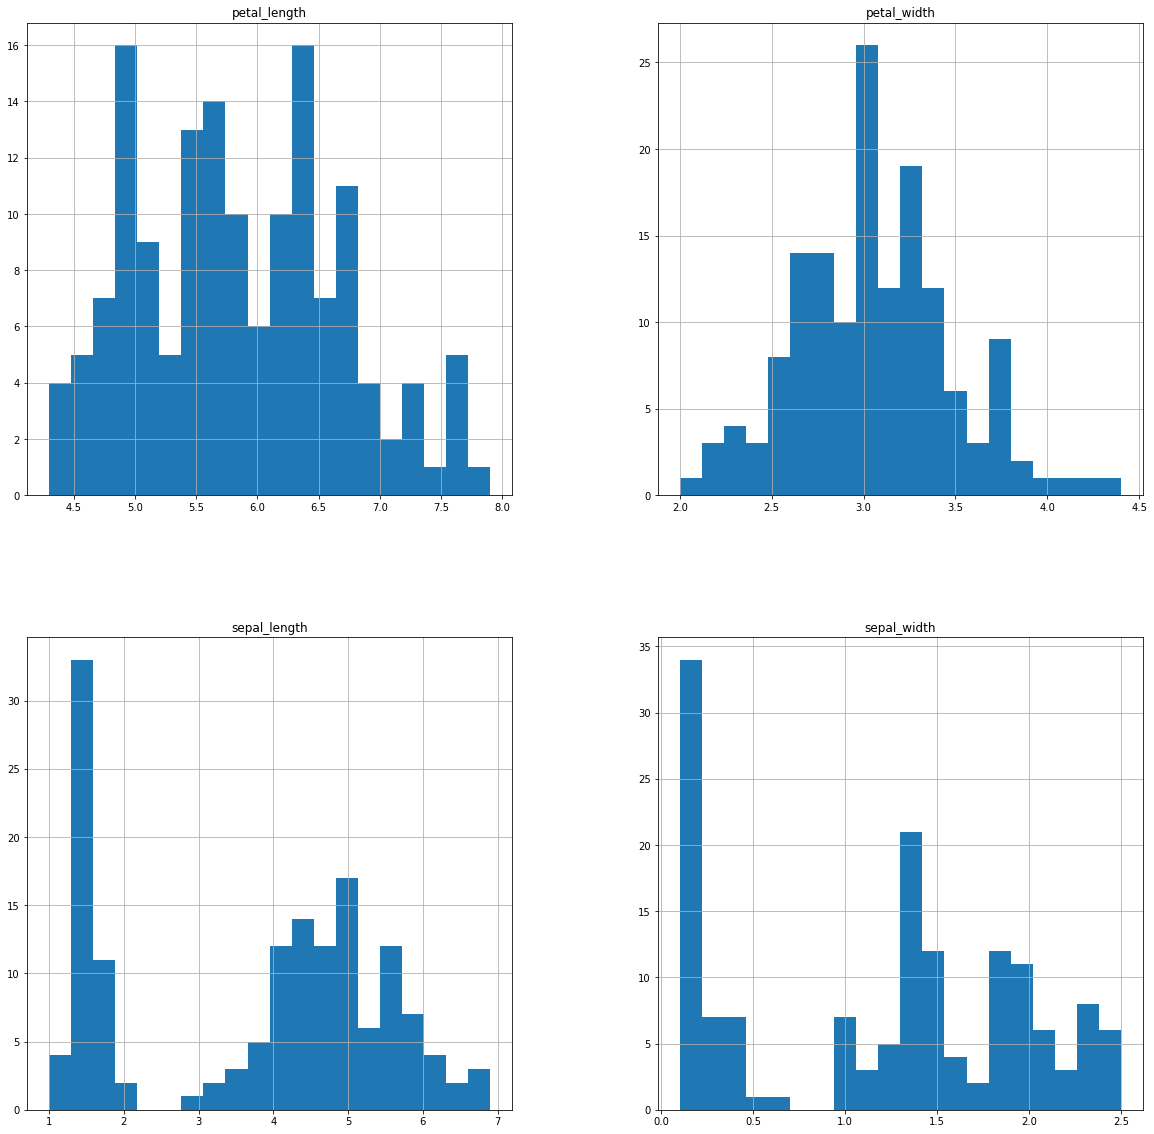

In [5]:
plt.rcParams["figure.figsize"] = (20, 20)
features.hist(bins=20)
plt.show()

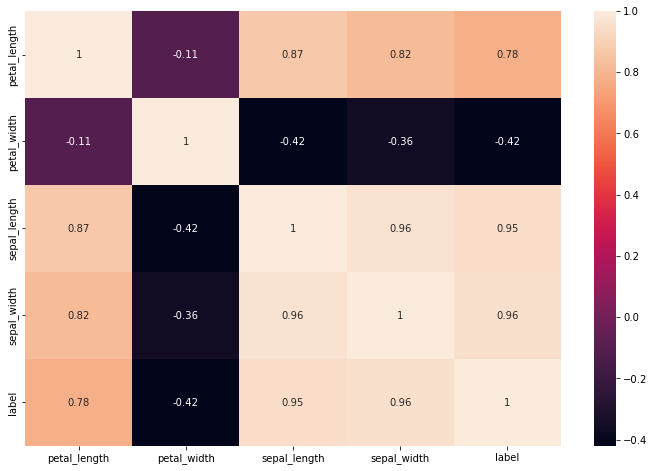

In [6]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

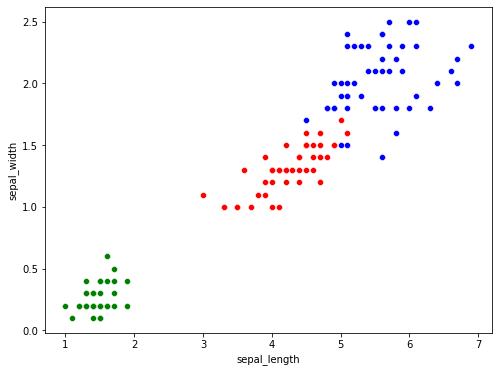

In [7]:
df1 = df[df['label']==0]
df2 = df[df['label']==1]
df3 = df[df['label']==2]

plt.figure(figsize=(8, 6))

sns.scatterplot(x='sepal_length', y='sepal_width', data=df1, color='green')
sns.scatterplot(x='sepal_length', y='sepal_width', data=df2, color='red')
sns.scatterplot(x='sepal_length', y='sepal_width', data=df3, color='blue')

# sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='purple', marker='*')


plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.show()

### K-means

In [8]:
kmeans = KMeans(3)
pred = kmeans.fit_predict(features)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [9]:
results['K_means_Cluster'] = pred
results.head()

,petal_length,petal_width,sepal_length,sepal_width,label,K_means_Cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


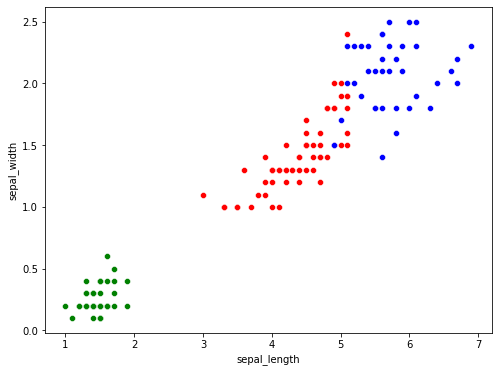

In [10]:
df1 = results[results['K_means_Cluster']==0]
df2 = results[results['K_means_Cluster']==1]
df3 = results[results['K_means_Cluster']==2]

plt.figure(figsize=(8, 6))

sns.scatterplot(x='sepal_length', y='sepal_width', data=df1, color='red')
sns.scatterplot(x='sepal_length', y='sepal_width', data=df2, color='green')
sns.scatterplot(x='sepal_length', y='sepal_width', data=df3, color='blue')

# sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='purple', marker='*')


plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.show()

### GMM

In [13]:
gmm = GaussianMixture(n_components=3)
gmm.fit(features)

gmm_pred = gmm.predict(features)
gmm_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
results['GMM_means_Cluster'] = gmm_pred
results

,petal_length,petal_width,sepal_length,sepal_width,label,K_means_Cluster,GMM_means_Cluster
0,5.1,3.5,1.4,0.2,0,1,1
1,4.9,3.0,1.4,0.2,0,1,1
2,4.7,3.2,1.3,0.2,0,1,1
3,4.6,3.1,1.5,0.2,0,1,1
4,5.0,3.6,1.4,0.2,0,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,0
146,6.3,2.5,5.0,1.9,2,0,0
147,6.5,3.0,5.2,2.0,2,2,0
148,6.2,3.4,5.4,2.3,2,2,0


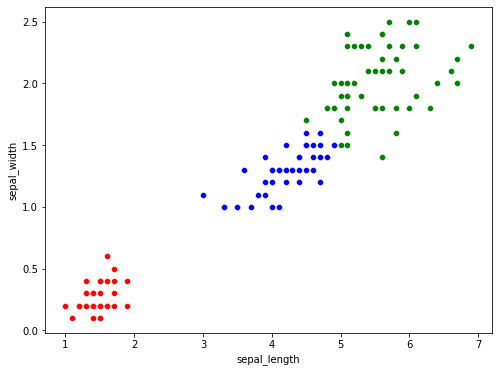

In [15]:
df1 = results[results['GMM_means_Cluster']==0]
df2 = results[results['GMM_means_Cluster']==1]
df3 = results[results['GMM_means_Cluster']==2]

plt.figure(figsize=(8, 6))

sns.scatterplot(x='sepal_length', y='sepal_width', data=df1, color='green')
sns.scatterplot(x='sepal_length', y='sepal_width', data=df2, color='red')
sns.scatterplot(x='sepal_length', y='sepal_width', data=df3, color='blue')

# sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='purple', marker='*')


plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.show()

### Vector Quantization

In [16]:
# LVQ
from random import seed
from random import randrange
from math import sqrt

In [17]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [18]:
# Locate the best matching unit
def get_best_matching_unit(codebooks, test_row):
    distances = list()
    for codebook in codebooks:
        dist = euclidean_distance(codebook, test_row)
        distances.append((codebook, dist))
    distances.sort(key=lambda tup: tup[1])
    return distances[0][0]

In [19]:
# Create a random codebook vector
def random_codebook(train):
    n_records = len(train)
    n_features = len(train[0])
    codebook = [train[randrange(n_records)][i] for i in range(n_features)]
    return codebook

In [20]:
# Train a set of codebook vectors
def train_codebooks(train, n_codebooks, lrate, epochs):
    codebooks = [random_codebook(train) for i in range(n_codebooks)]
    for epoch in range(epochs):
        rate = lrate * (1.0-(epoch/float(epochs)))
        sum_error = 0.0
        for row in train:
            bmu = get_best_matching_unit(codebooks, row)
            for i in range(len(row)-1):
                error = row[i] - bmu[i]
                sum_error += error**2
                if bmu[-1] == row[-1]:
                    bmu[i] += rate * error
                else:
                    bmu[i] -= rate * error
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, rate, sum_error))
    return codebooks

In [ ]:
# Test the training function
seed(1)
learn_rate = 0.3
n_epochs = 10
n_codebooks = 2
codebooks = train_codebooks(dataset, n_codebooks, learn_rate, n_epochs)
print('Codebooks: %s' % codebooks)

### Elbow method

In [14]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Alcohol', 'Ash_Alcanity']])
    sse.append(km.inertia_)

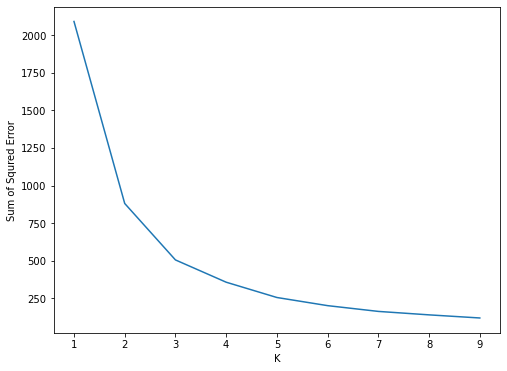

In [15]:
# Elbow Plot

fig = plt.figure(figsize=(8,6))

plt.xlabel('K')
plt.ylabel('Sum of Squred Error')
plt.plot(k_rng,sse)

### GMM

In [31]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df)

gmm_pred = gmm.predict(df)
frame = pd.DataFrame(df)
frame['GMM_means_Cluster'] = gmm_pred
frame

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,K_means_Cluster,GMM_means_Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,2


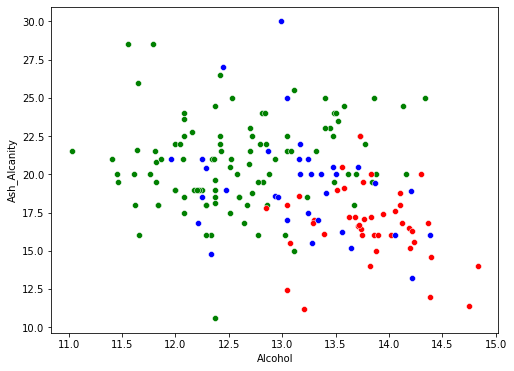

In [32]:
df1 = df[df['GMM_means_Cluster']==0]
df2 = df[df['GMM_means_Cluster']==1]
df3 = df[df['GMM_means_Cluster']==2]

plt.figure(figsize=(8, 6))

sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df1, color='green')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df2, color='red')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df3, color='blue')

# sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='purple', marker='*')


plt.xlabel('Alcohol')
plt.ylabel('Ash_Alcanity')

plt.show()

### SVM

In [39]:
pca = PCA(n_components=3, svd_solver='full')
pca.fit(df)

pca_pred = pca.transform(df)
pca_pred
#frame = pd.DataFrame(df)
#frame['PCA_means_Cluster'] = pca_pred
#frame

array([[ 3.18563051e+02,  2.14813083e+01,  3.13272179e+00],
       [ 3.03097515e+02, -5.36839556e+00,  6.82353412e+00],
       [ 4.38061008e+02, -6.54614358e+00, -1.10693419e+00],
       [ 7.33239533e+02,  1.70562619e-01, -9.15631661e-01],
       [-1.15682934e+01,  1.85238361e+01, -5.47410394e-01],
       [ 7.03230635e+02, -3.52991998e-01,  9.50606786e-01],
       [ 5.42971284e+02, -1.35302352e+01,  2.13012616e+00],
       [ 5.48401556e+02,  1.14318996e+01,  4.54164309e-02],
       [ 2.98036966e+02, -8.18298870e+00,  3.88311933e+00],
       [ 2.98049656e+02, -7.10465226e+00,  1.55982022e+00],
       [ 7.63079057e+02, -8.35563011e+00, -1.88034613e+00],
       [ 5.32942947e+02, -1.42983440e+01,  1.35447471e-01],
       [ 5.72834064e+02, -2.10156819e+01,  3.76852696e-01],
       [ 4.02925290e+02, -1.61077113e+01,  5.67557846e+00],
       [ 8.00052678e+02, -1.21402528e+01,  3.04473124e+00],
       [ 5.63245249e+02,  2.19894022e+00, -5.23799140e-01],
       [ 5.33379371e+02,  1.07879866e+01

In [ ]:
df1 = df[df['PCA_means_Cluster']==0]
df2 = df[df['PCA_means_Cluster']==1]
df3 = df[df['PCA_means_Cluster']==2]

plt.figure(figsize=(8, 6))

sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df1, color='green')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df2, color='red')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=df3, color='blue')

# sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='purple', marker='*')


plt.xlabel('Alcohol')
plt.ylabel('Ash_Alcanity')

plt.show()